In [1]:
import pandas as pd

In [24]:
import matplotlib.pyplot as plt

In [32]:
import numpy as np

In [25]:
import seaborn as sns

In [3]:
from scipy import stats

In [10]:
red_wine_path = '/content/winequality-red.csv'
white_wine_path = '/content/wine-quality-white-and-red.csv'

In [8]:
red_wine = pd.read_csv(red_wine_path)

In [11]:
both_wine = pd.read_csv(white_wine_path)

In [12]:
red_wine.shape

(1599, 12)

In [14]:
both_wine.shape

(6497, 13)

Both datasets are not big and we don't need to operate in chunks

In [15]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
both_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [18]:
both_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


We can see that both datasets have the same columns, so it ie easy to make a pivot table. The data is numeric, most part is in float

In [19]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
both_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [21]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
both_wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [38]:
features = red_wine.columns[:-1]

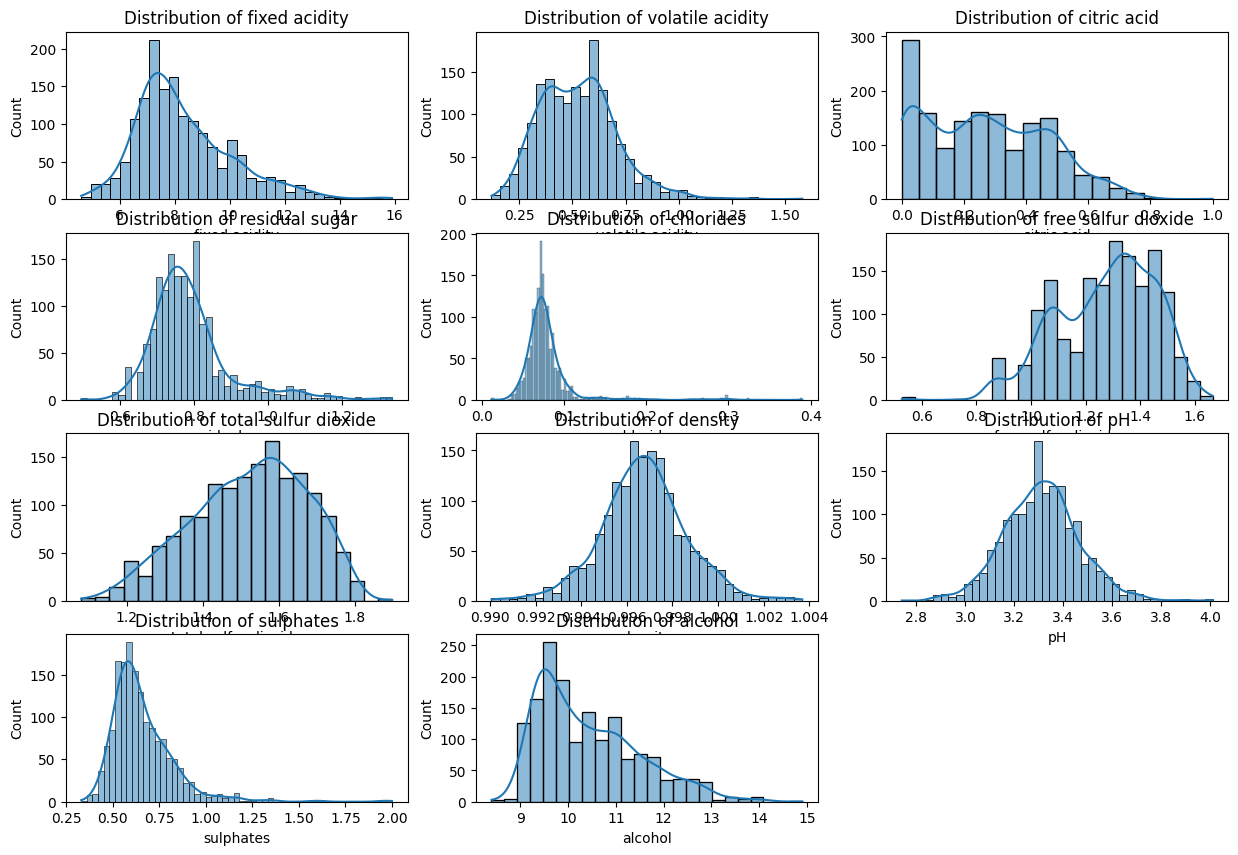

In [39]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(red_wine[feature], kde=True)
    plt.title(f'Distribution of {feature}')

In [40]:
skewed_features = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']
for feature in skewed_features:
    red_wine[feature] = red_wine[feature].apply(lambda x: np.log(x + 1))

In [44]:
correlation_matrix = red_wine[features].corr()

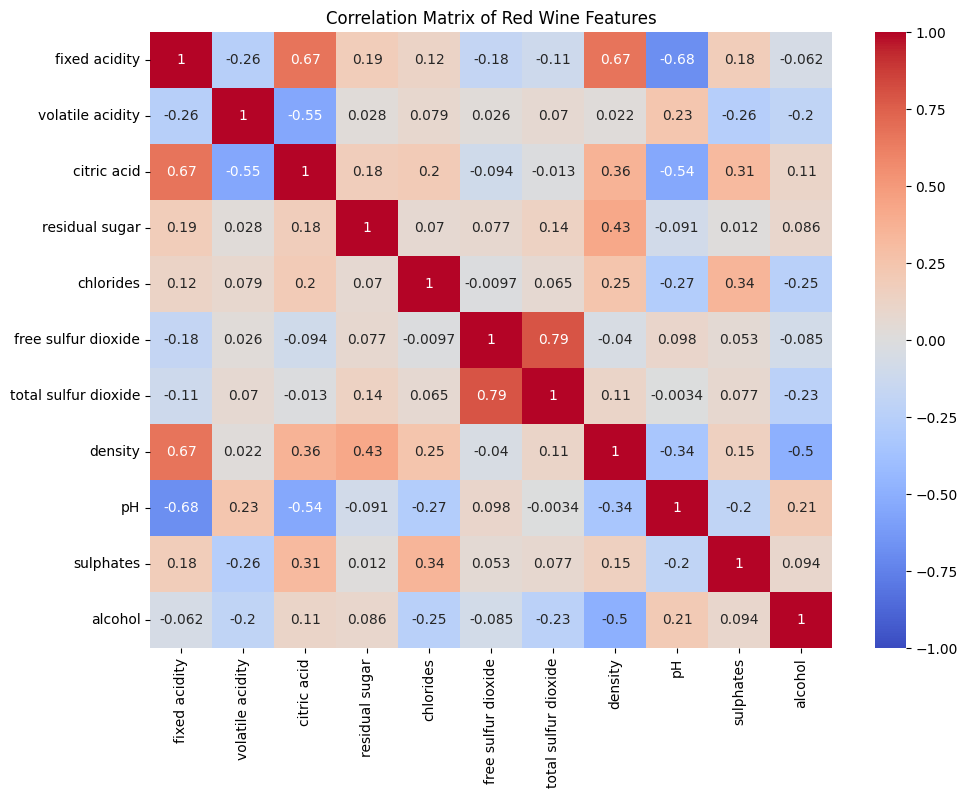

In [45]:
plt.figure(figsize=(11, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Red Wine Features')
plt.show()

In [47]:
correlation_with_quality = red_wine.corr()['quality'].sort_values(ascending=False)
print("\nCorrelation of Chemical Properties with Quality in Red Wine Dataset:\n")
print(correlation_with_quality)


Correlation of Chemical Properties with Quality in Red Wine Dataset:

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.025281
free sulfur dioxide    -0.048339
pH                     -0.057731
chlorides              -0.144170
total sulfur dioxide   -0.158389
density                -0.174919
volatile acidity       -0.390558
Name: quality, dtype: float64


In [48]:
both_wine['wine_type'] = np.where(both_wine['type'] == 'red', 'red', 'white')


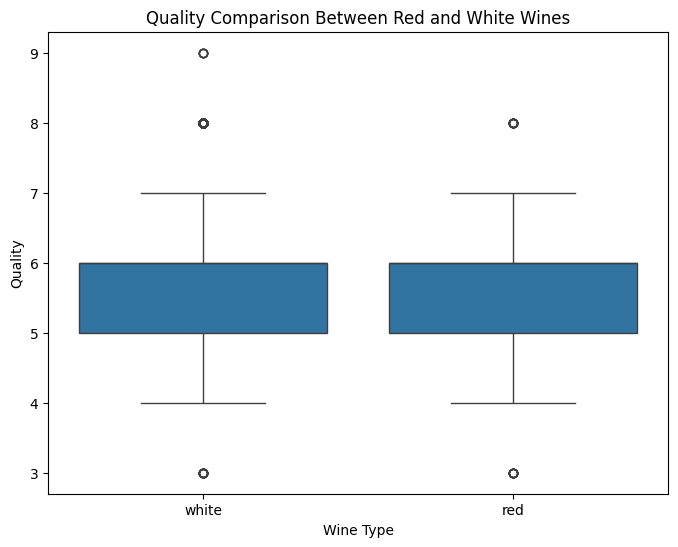

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='wine_type', y='quality', data=both_wine)
plt.title('Quality Comparison Between Red and White Wines')
plt.xlabel('Wine Type')
plt.ylabel('Quality')
plt.show()

a boxplot to compare the quality distribution between red and white wines. The box represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). This covers the middle 50% of the data.
The line inside the box represents the median (Q2) of the data. The whiskers extend from the box to the smallest and largest values within 1.5 * IQR from the first and third quartile, respectively. These typically represent the range of the majority of the data, excluding outliers. Data points outside the whiskers are considered outliers and are plotted as individual points. These represent values that are significantly higher or lower than the rest of the data

In [50]:
red_wine_quality = both_wine[both_wine['wine_type'] == 'red']['quality']
white_wine_quality = both_wine[both_wine['wine_type'] == 'white']['quality']

In [51]:
t_stat, p_value = stats.ttest_ind(red_wine_quality, white_wine_quality)
print("\nT-test Results:\n")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-test Results:

T-statistic: -9.685649554187696
P-value: 4.888069044201508e-22


In [52]:
if p_value < 0.05:
    print("There is a significant difference in quality between red and white wines.")
else:
    print("There is no significant difference in quality between red and white wines.")

There is a significant difference in quality between red and white wines.


Conduct a t-test to determine if there is a significant difference in quality between red and white wines.
